_______________________________________________________________________________________________
data loading
_______________________________________________________________________________________________
data cleaning
                                              Phrase  \
0  wishin I could go to home depot to buy shit to...   
1  @ verizon I'm having great difficulty getting ...   
2  Please don't believe the rumors that I'm a "Ch...   
3            @PUBG PLEASE SORT OUT AND NEWS CRASHES!   
4  Features Fix the errors in the new GTA Mark V ...   

                                           Processed  
0     wishin could go home depot buy shit build shit  
1  verizon great difficulty getting access past b...  
2  please believe rumor champion league player ug...  
3                             please sort news crash  
4            feature fix error new gta mark v update  
_______________________________________________________________________________________________
feature engineerin

[nltk_data] Error loading stopwords: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


_______________________________________________________________________________________________
feature engineering GloVE
loading GloVe （dim：200）


loading: 1193514it [00:59, 20226.59it/s]


successful load 1193514  vectors
OOV Rate: 4.59%
GloVe shape of train set：(596, 200)
GloVe shape of test set：(397, 200)
_______________________________________________________________________________________________
feature engineering Word2Vec
_______________________________________________________________________________________________
baseline model regression
Baseline Logistic Regression Accuracy: 0.4786
              precision    recall  f1-score   support

           0       0.48      0.69      0.57       120
           1       0.42      0.48      0.45       106
           2       0.43      0.14      0.21        66
           3       0.57      0.45      0.50       105

    accuracy                           0.48       397
   macro avg       0.48      0.44      0.43       397
weighted avg       0.48      0.48      0.46       397

_______________________________________________________________________________________________
different data models

 feature: TF-IDF
Decision Tree wi

E:\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM with BERT: Accuracy = 0.4257
              precision    recall  f1-score   support

           0       0.49      0.47      0.48       120
           1       0.39      0.39      0.39       106
           2       0.31      0.41      0.36        66
           3       0.48      0.43      0.45       105

    accuracy                           0.43       397
   macro avg       0.42      0.42      0.42       397
weighted avg       0.43      0.43      0.43       397

skip Multinomial Naive Bayes with BERT for feature involve negative numbers

 feature: GloVE
Decision Tree with GloVE: Accuracy = 0.3300
              precision    recall  f1-score   support

           0       0.38      0.38      0.38       120
           1       0.34      0.32      0.33       106
           2       0.27      0.30      0.29        66
           3       0.30      0.30      0.30       105

    accuracy                           0.33       397
   macro avg       0.32      0.33      0.32       397
weighted

E:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best parameters: {'C': 1, 'solver': 'liblinear'}
Best cross-validation accuracy: 0.4648
Tuned Logistic Regression Accuracy: 0.4761
              precision    recall  f1-score   support

           0       0.48      0.69      0.56       120
           1       0.43      0.51      0.46       106
           2       0.35      0.09      0.14        66
           3       0.58      0.44      0.50       105

    accuracy                           0.48       397
   macro avg       0.46      0.43      0.42       397
weighted avg       0.47      0.48      0.45       397

_______________________________________________________________________________________________
visualization


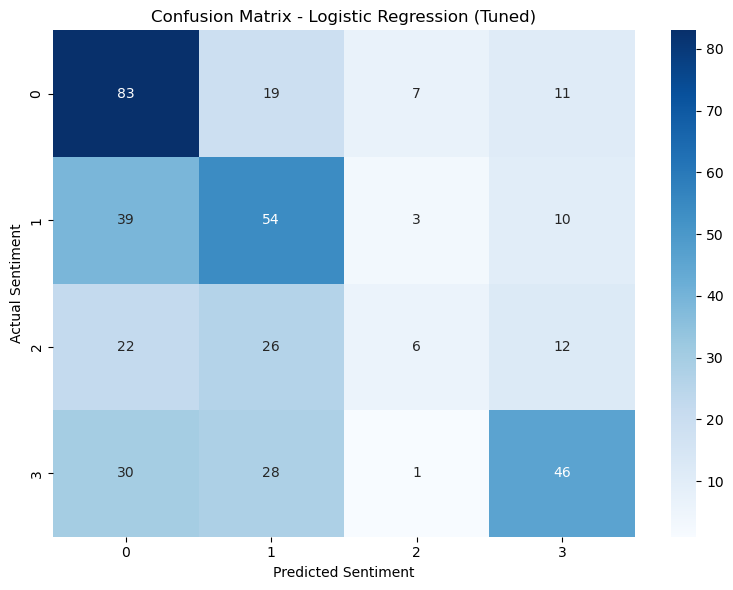

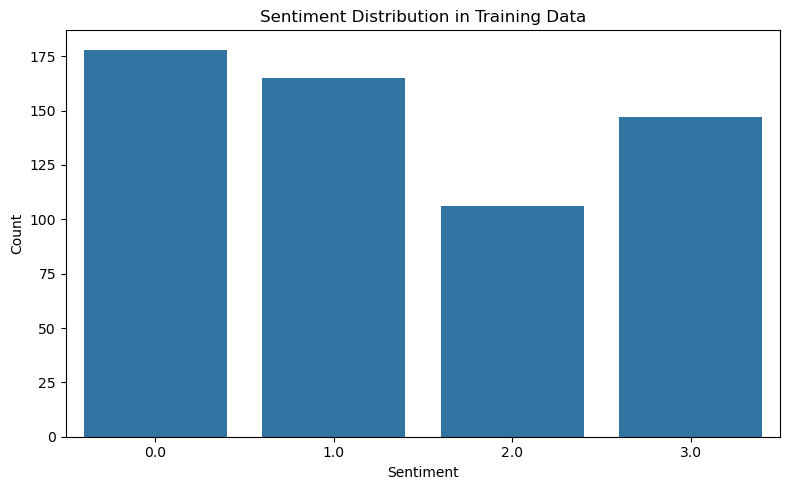

Visualization images saved to ../output


In [10]:
"""
data loading
"""

print("_______________________________________________________________________________________________")
print("data loading")

import pandas as pd

# 加载数据
train_df = pd.read_csv('C:/Users/LENOVO/Downloads/Lexicon-main/Lexicon-main/dataset/traindata7 no2.csv')
test_df = pd.read_csv('C:/Users/LENOVO/Downloads/Lexicon-main/Lexicon-main/dataset/testdata7 no2.csv')

"""
data cleaning
"""

print("_______________________________________________________________________________________________")
print("data cleaning")

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
# 有一定作用，但是有些词可能会降低正确率，比如lol
def game_specific_clean(text):
    text = re.sub(r'\b(gg|glhf|wp|noob|op)\b', lambda m: {
        'gg': 'good game',
        'glhf': 'good luck have fun',
        'wp': 'well played',
        'noob': 'inexperienced player',
        'op': 'overpowered'
    }[m.group(0).lower()], text, flags=re.IGNORECASE)
    return text


# 定义清洗函数
def clean_text(text):
    text = text.lower()  # 转小写
    text = game_specific_clean(text)
    text = re.sub(r'@\w+', ' ', text)  # 去除@用户
    text = re.sub(r'http\S+', ' ', text)  # 去除URL链接
    text = re.sub(r'[^a-z\s]', ' ', text)  # 去除标点符号、数字
    text = re.sub(r'\s+', ' ', text).strip()  # 去除多余空格
    return text


# 应用清洗函数
train_df['cleaned_Phrase'] = train_df['Phrase'].apply(clean_text)
test_df['cleaned_Phrase'] = test_df['Phrase'].apply(clean_text)

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def tokenize_lemmatize(text):
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)


# 应用去除停用词和词形还原
train_df['Processed'] = train_df['cleaned_Phrase'].apply(tokenize_lemmatize)
test_df['Processed'] = test_df['cleaned_Phrase'].apply(tokenize_lemmatize)

# 查看清洗后的数据
print(train_df[['Phrase', 'Processed']].head())

# 仅保存清洗后的文本和Sentiment列
train_df[['Processed', 'Sentiment']].to_csv('C:/Users/LENOVO/Downloads/Lexicon-main/Lexicon-main/dataset/cleaned_traindata7.csv', index=False)
test_df[['Processed', 'Sentiment']].to_csv('C:/Users/LENOVO/Downloads/Lexicon-main/Lexicon-main/dataset/cleaned_testdata7.csv', index=False)

"""
feature engineering TFIDF
"""

print("_______________________________________________________________________________________________")
print("feature engineering TFIDF")

from sklearn.feature_extraction.text import TfidfVectorizer

# 使用清洗后的文本数据进行特征提取
X_train = train_df['Processed']
y_train = train_df['Sentiment']
X_test = test_df['Processed']
y_test = test_df['Sentiment']

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

"""
feature engineering BERT
"""

print("_______________________________________________________________________________________________")
print("feature engineering BERT")

# 修改BERT特征提取部分
import torch  # 添加torch导入
import numpy as np
from transformers import AutoTokenizer, AutoModel

# 使用游戏领域专用模型
MODEL_NAME = "finiteautomata/bertweet-base-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModel.from_pretrained(MODEL_NAME)

# 优化编码函数
def bert_encode(texts, tokenizer, model, batch_size=32, max_length=64):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    all_embeddings = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(
            batch,
            return_tensors='pt',
            truncation=True,
            padding='longest',
            max_length=max_length
        ).to(device)
        
        with torch.no_grad():
            outputs = model(**inputs)
        
        # 使用最后一层CLS token作为特征
        embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        all_embeddings.extend(embeddings)
    
    return np.array(all_embeddings)

# 提取BERT特征
X_train_bert = bert_encode(X_train.tolist(), tokenizer, model)
X_test_bert = bert_encode(X_test.tolist(), tokenizer, model)

"""
feature engineering GloVE
"""

print("_______________________________________________________________________________________________")
print("feature engineering GloVE")

import os
import numpy as np
from tqdm import tqdm

# 配置参数
GLOVE_DIM = 200 
# in this part u should download glove.twitter.27B.200d in 
GLOVE_PATH = "C:/Users/LENOVO/Downloads/Lexicon-main/Lexicon-main/glove.twitter.27B/glove.twitter.27B.200d.txt"


def load_glove_embeddings(glove_path, expected_dim=200):
    embeddings_index = {}
    if not os.path.exists(glove_path):
        print(f"GloVe is not exi：{glove_path}")
        return embeddings_index

    print(f"loading GloVe （dim：{expected_dim}）")
    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in tqdm(f, desc="loading"):
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            if len(vector) != expected_dim:
                if len(vector) > expected_dim:
                    vector = vector[:expected_dim]
                else:
                    vector = np.pad(vector, (0, expected_dim - len(vector)), 'constant')

            embeddings_index[word] = vector
    print(f"successful load {len(embeddings_index)}  vectors")
    return embeddings_index


# 加载词向量
embeddings_index = load_glove_embeddings(GLOVE_PATH, GLOVE_DIM)


def glove_encode(texts, embeddings_index, dim=GLOVE_DIM):
    encoded = []
    for text in texts:
        words = text.split()

        # 处理空文本
        if not words:
            encoded.append(np.zeros(dim))
            continue

        vectors = []
        for word in words:
            # 获取词向量（带维度验证）
            vec = embeddings_index.get(word, np.zeros(dim))
            if len(vec) != dim:
                vec = np.zeros(dim)
            vectors.append(vec)

        # 计算均值
        vectors_mean = np.mean(vectors, axis=0) if vectors else np.zeros(dim)
        encoded.append(vectors_mean)

    return np.array(encoded)
#计算oov，看看词向量是否匹配
total_words = sum(len(text.split()) for text in X_train)
oov_words = sum(1 for text in X_train for word in text.split() if word not in embeddings_index)
print(f"OOV Rate: {oov_words / total_words:.2%}")
# 生成特征
X_train_glove = glove_encode(X_train, embeddings_index, dim=GLOVE_DIM)
X_test_glove = glove_encode(X_test, embeddings_index, dim=GLOVE_DIM)

# 验证输出形状
print(f"GloVe shape of train set：{X_train_glove.shape}")
print(f"GloVe shape of test set：{X_test_glove.shape}")

"""
feature engineering Word2Vec
"""

print("_______________________________________________________________________________________________")
print("feature engineering Word2Vec")

from gensim.models import Word2Vec
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 自定义Word2Vec转换器（兼容scikit-learn接口）
class Word2VecVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, vector_size=100, window=5, min_count=2, sg=0, epochs=10):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.sg = sg  # 0: CBOW, 1: Skip-Gram
        self.epochs = epochs
        self.model = None
        self.dim = vector_size

    def fit(self, X, y=None):
        # 将文本转换为token列表
        sentences = [text.split() for text in X]
        
        # 训练Word2Vec模型
        self.model = Word2Vec(
            sentences=sentences,
            vector_size=self.vector_size,
            window=self.window,
            min_count=self.min_count,
            sg=self.sg,
            epochs=self.epochs,
            workers=4
        )
        return self

    def transform(self, X):
        # 将文本转换为向量均值
        return np.array([
            self._text_to_vec(text) for text in X
        ])

    def _text_to_vec(self, text):
        vectors = [self.model.wv[word] for word in text.split() if word in self.model.wv]
        return np.mean(vectors, axis=0) if vectors else np.zeros(self.dim)

# 构建完整Pipeline
w2v_pipeline = Pipeline([
    ('w2v', Word2VecVectorizer()),  # 自定义词向量转换器
    ('clf', LogisticRegression(max_iter=1000))  # 下游分类器
])

# 定义参数搜索空间
param_grid = {
    'w2v__vector_size': [50, 100, 200],      # 向量维度
    'w2v__window': [1, 3, 5],              # 上下文窗口
    'w2v__sg': [0, 1],                  # 算法选择
    'w2v__min_count': [1, 2, 3],           # 最小词频
    'w2v__epochs': [10, 30, 40],            # 训练轮次 
    'clf__C': [0.1, 1, 10]             # 分类器正则化参数
}

# 初始化GridSearch
grid_search = GridSearchCV(
    estimator=w2v_pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=2,  # 使用2折交叉验证加速
    n_jobs=-1,
    verbose=1
)

# 执行网格搜索
print("Start Word2Vec parameter tuning...")
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# 使用最优模型生成特征
best_w2v_model = grid_search.best_estimator_.named_steps['w2v'].model

def optimized_word2vec_encode(texts, model, dim):
    encoded = []
    for text in texts:
        vectors = [model.wv[word] for word in text.split() if word in model.wv]
        if vectors:
            vectors_mean = np.mean(vectors, axis=0)
        else:
            vectors_mean = np.zeros(dim)
        encoded.append(vectors_mean)
    return np.array(encoded)

# 获取最优维度参数
best_dim = grid_search.best_params_['w2v__vector_size']

# 生成优化后的特征
X_train_w2v = optimized_word2vec_encode(X_train, best_w2v_model, best_dim)
X_test_w2v = optimized_word2vec_encode(X_test, best_w2v_model, best_dim)

"""
different data models
"""

print("_______________________________________________________________________________________________")
print("different data models")

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import os

# 创建output文件夹（若不存在）
output_dir = '../output'
os.makedirs(output_dir, exist_ok=True)

# 定义各个特征集
feature_sets = {
    'TF-IDF': (X_train_tfidf, X_test_tfidf),
    'BERT': (X_train_bert, X_test_bert),
    'GloVE': (X_train_glove, X_test_glove),
    'Word2Vec': (X_train_w2v, X_test_w2v)  # 使用优化后的特征
}

# 模型列表定义
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=28),
    'Gradient Boosting': GradientBoostingClassifier(random_state=28),
    'Random Forest': RandomForestClassifier(random_state=28),
    'Linear SVM': LinearSVC(random_state=28, max_iter=100),
    'Multinomial Naive Bayes': MultinomialNB()
}

# 存储模型准确率
model_accuracies = {}

# 循环对比每种特征的效果
for feature_name, (X_tr, X_te) in feature_sets.items():
    print(f"\n feature: {feature_name}")

    for model_name, model in models.items():
        if model_name == 'Multinomial Naive Bayes' and feature_name in ['BERT', 'GloVE', 'Word2Vec']:
            print(f"skip {model_name} with {feature_name} for feature involve negative numbers")
            continue

        model.fit(X_tr, y_train)
        predictions = model.predict(X_te)
        accuracy = accuracy_score(y_test, predictions)
        model_accuracies[model_name + " with " + feature_name] = accuracy
        print(f"{model_name} with {feature_name}: Accuracy = {accuracy:.4f}")
        print(classification_report(y_test, predictions))

# 比较各个模型的准确率
print("\nModel Performance Comparison:")
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")

# 将模型性能保存到csv文件中
performance_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])
performance_df.to_csv(os.path.join(output_dir, 'model_performance_comparison.csv'), index=False)

print(f"\nresults saved to {os.path.join(output_dir, 'model_performance_comparison.csv')}")
"""
baseline model regression
"""

print("_______________________________________________________________________________________________")
print("baseline model regression")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 训练基线模型
baseline_model = LogisticRegression(max_iter=200)
baseline_model.fit(X_train_tfidf, y_train)

# 测试基线模型性能
baseline_preds = baseline_model.predict(X_test_tfidf)
baseline_accuracy = accuracy_score(y_test, baseline_preds)
print(f'Baseline Logistic Regression Accuracy: {baseline_accuracy:.4f}')
print(classification_report(y_test, baseline_preds))

"""
different data models
"""

print("_______________________________________________________________________________________________")
print("different data models")

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import os

# 创建output文件夹（若不存在）
output_dir = '../output'
os.makedirs(output_dir, exist_ok=True)

# 定义各个特征集
feature_sets = {
    'TF-IDF': (X_train_tfidf, X_test_tfidf),
    'BERT': (X_train_bert, X_test_bert),
    'GloVE': (X_train_glove, X_test_glove),
    'Word2Vec': (X_train_w2v, X_test_w2v)
}

# 模型列表定义
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=28),
    'Gradient Boosting': GradientBoostingClassifier(random_state=28),
    'Random Forest': RandomForestClassifier(random_state=28),
    'Linear SVM': LinearSVC(random_state=28, max_iter=100),
    'Multinomial Naive Bayes': MultinomialNB()
}

# 存储模型准确率
model_accuracies = {}

# 循环对比每种特征的效果
for feature_name, (X_tr, X_te) in feature_sets.items():
    print(f"\n feature: {feature_name}")

    for model_name, model in models.items():
        # 跳过不兼容的组合 (BERT, GloVE, Word2Vec 不适合 MultinomialNB)
        if model_name == 'Multinomial Naive Bayes' and feature_name in ['BERT', 'GloVE', 'Word2Vec']:
            print(f"skip {model_name} with {feature_name} for feature involve negative numbers")
            continue

        model.fit(X_tr, y_train)
        predictions = model.predict(X_te)
        accuracy = accuracy_score(y_test, predictions)
        model_accuracies[model_name + " with " + feature_name] = accuracy
        print(f"{model_name} with {feature_name}: Accuracy = {accuracy:.4f}")
        print(classification_report(y_test, predictions))

# 比较各个模型的准确率
print("\nModel Performance Comparison:")
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")

# 将模型性能保存到csv文件中
performance_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])
performance_df.to_csv(os.path.join(output_dir, 'model_performance_comparison.csv'), index=False)

print(f"\nresults saved to {os.path.join(output_dir, 'model_performance_comparison.csv')}")

"""
hyperparameter_tuning
"""

print("_______________________________________________________________________________________________")
print("hyperparameter_tuning")

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation accuracy: {grid_search.best_score_:.4f}')

# 使用最佳参数的模型进行预测
best_model = grid_search.best_estimator_
best_preds = best_model.predict(X_test_tfidf)
best_accuracy = accuracy_score(y_test, best_preds)
print(f'Tuned Logistic Regression Accuracy: {best_accuracy:.4f}')
print(classification_report(y_test, best_preds))

"""
visualization
"""

print("_______________________________________________________________________________________________")
print("visualization")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os

# 创建output文件夹（若不存在）
output_dir = '../output'
os.makedirs(output_dir, exist_ok=True)

# 混淆矩阵（最佳模型）
cm = confusion_matrix(y_test, best_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (Tuned)')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.tight_layout()

# 保存混淆矩阵图像
confusion_matrix_path = os.path.join(output_dir, 'confusion_matrix.png')
plt.savefig(confusion_matrix_path)
plt.show()

# 标签分布（训练数据）
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=train_df)
plt.title('Sentiment Distribution in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()

# 保存标签分布图像
label_distribution_path = os.path.join(output_dir, 'label_distribution.png')
plt.savefig(label_distribution_path)
plt.show()

print(f"Visualization images saved to {output_dir}")

In [5]:
!pip install transformers

   ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.2 MB 3.4 MB/s eta 0:00:03
   ---------------------------------------- 0.1/10.2 MB 3.6 MB/s eta 0:00:03
    --------------------------------------- 0.2/10.2 MB 1.7 MB/s eta 0:00:06
   - -------------------------------------- 0.3/10.2 MB 1.9 MB/s eta 0:00:06
   - -------------------------------------- 0.4/10.2 MB 1.9 MB/s eta 0:00:06
   - -------------------------------------- 0.4/10.2 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/10.2 MB 1.8 MB/s eta 0:00:06
   -- ------------------------------------- 0.8/10.2 MB 2.3 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/10.2 MB 2.6 MB/s eta 0:00:04
   ---- ----------------------------------- 1.2/10.2 MB 2.7 MB/s eta 0:00:04
   ----- ---------------------------------- 1.5/10.2 MB 3.0 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/10.2 MB 3.3 MB/s eta 0:00:03
   ---

In [21]:
!pip install scikit-learn==1.6.1

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.1 MB 2.2 MB/s eta 0:00:06
    --------------------------------------- 0.3/11.1 MB 2.8 MB/s eta 0:00:04
   - -------------------------------------- 0.4/11.1 MB 3.1 MB/s eta 0:00:04
   - -------------------------------------- 0.5/11.1 MB 2.6 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/11.1 MB 3.0 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/11.1 MB 2.7 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.1 MB 3.0 MB/s eta 0:00:04
   --- ------------------------------------ 1.1/11.1 MB 3.0 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.1 MB 3.2 MB/s eta 0:00:04
   ----- ---------------------------------- 1.5/11.1 MB 3.4 MB/s eta 0:00:03
   ------ --------------------------------- 1.7/11.1 MB 3.4 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/11.1 MB 3.3 MB/s eta 0:00:03
   ---

  You can safely remove it manually.


_______________________________________________________________________________________________
data loading
_______________________________________________________________________________________________
data cleaning
                                              Phrase  \
0  wishin I could go to home depot to buy shit to...   
1  @ verizon I'm having great difficulty getting ...   
2  Please don't believe the rumors that I'm a "Ch...   
3            @PUBG PLEASE SORT OUT AND NEWS CRASHES!   
4  Features Fix the errors in the new GTA Mark V ...   

                                           Processed  
0     wishin could go home depot buy shit build shit  
1  verizon great difficulty getting access past b...  
2  please believe rumor champion league player ug...  
3                             please sort news crash  
4            feature fix error new gta mark v update  
_______________________________________________________________________________________________
feature engineerin

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at finiteautomata/bertweet-base-sentiment-analysis and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


_______________________________________________________________________________________________
feature engineering GloVE
loading GloVe （dim：200）


loading: 1193514it [00:57, 20831.81it/s]


successful load 1193514  vectors
OOV Rate: 4.59%
GloVe shape of train set：(596, 200)
GloVe shape of test set：(397, 200)
_______________________________________________________________________________________________
feature engineering Word2Vec
Start Word2Vec parameter tuning...
Fitting 2 folds for each of 486 candidates, totalling 972 fits


E:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
432 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "E:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
         ^^^^^^


Best parameters: {'clf__C': 10, 'w2v__epochs': 40, 'w2v__min_count': 2, 'w2v__sg': 1, 'w2v__vector_size': 100, 'w2v__window': 5}
Best cross-validation score: 0.42
_______________________________________________________________________________________________
different data models

 feature: TF-IDF
Decision Tree with TF-IDF: Accuracy = 0.3929
              precision    recall  f1-score   support

           0       0.48      0.39      0.43       120
           1       0.38      0.42      0.40       106
           2       0.26      0.24      0.25        66
           3       0.40      0.47      0.43       105

    accuracy                           0.39       397
   macro avg       0.38      0.38      0.38       397
weighted avg       0.40      0.39      0.39       397

Gradient Boosting with TF-IDF: Accuracy = 0.4257
              precision    recall  f1-score   support

           0       0.45      0.57      0.51       120
           1       0.40      0.42      0.41       106
        

E:\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM with BERT: Accuracy = 0.4710
              precision    recall  f1-score   support

           0       0.60      0.63      0.62       120
           1       0.45      0.55      0.50       106
           2       0.29      0.30      0.30        66
           3       0.45      0.31      0.37       105

    accuracy                           0.47       397
   macro avg       0.45      0.45      0.44       397
weighted avg       0.47      0.47      0.47       397

skip Multinomial Naive Bayes with BERT for feature involve negative numbers

 feature: GloVE
Decision Tree with GloVE: Accuracy = 0.2972
              precision    recall  f1-score   support

           0       0.36      0.36      0.36       120
           1       0.26      0.26      0.26       106
           2       0.24      0.18      0.21        66
           3       0.29      0.33      0.31       105

    accuracy                           0.30       397
   macro avg       0.29      0.28      0.28       397
weighted

E:\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM with BERT: Accuracy = 0.4710
              precision    recall  f1-score   support

           0       0.60      0.63      0.62       120
           1       0.45      0.55      0.50       106
           2       0.29      0.30      0.30        66
           3       0.45      0.31      0.37       105

    accuracy                           0.47       397
   macro avg       0.45      0.45      0.44       397
weighted avg       0.47      0.47      0.47       397

skip Multinomial Naive Bayes with BERT for feature involve negative numbers

 feature: GloVE
Decision Tree with GloVE: Accuracy = 0.2972
              precision    recall  f1-score   support

           0       0.36      0.36      0.36       120
           1       0.26      0.26      0.26       106
           2       0.24      0.18      0.21        66
           3       0.29      0.33      0.31       105

    accuracy                           0.30       397
   macro avg       0.29      0.28      0.28       397
weighted

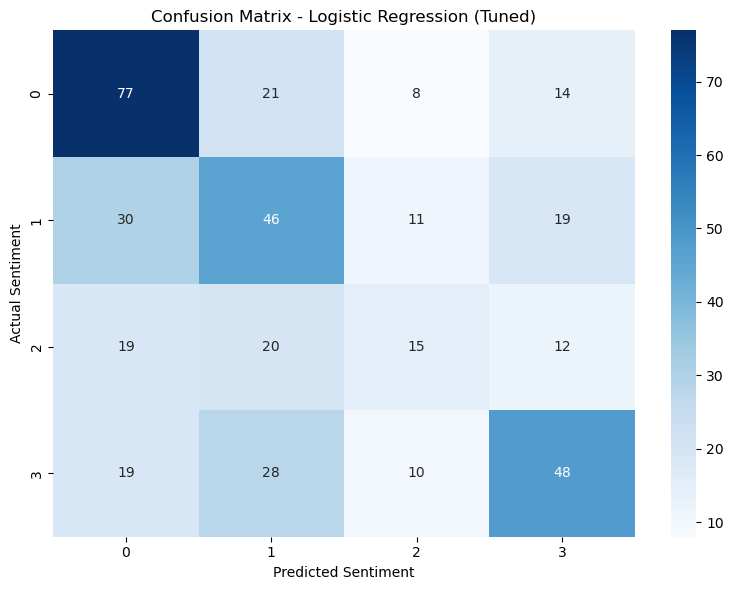

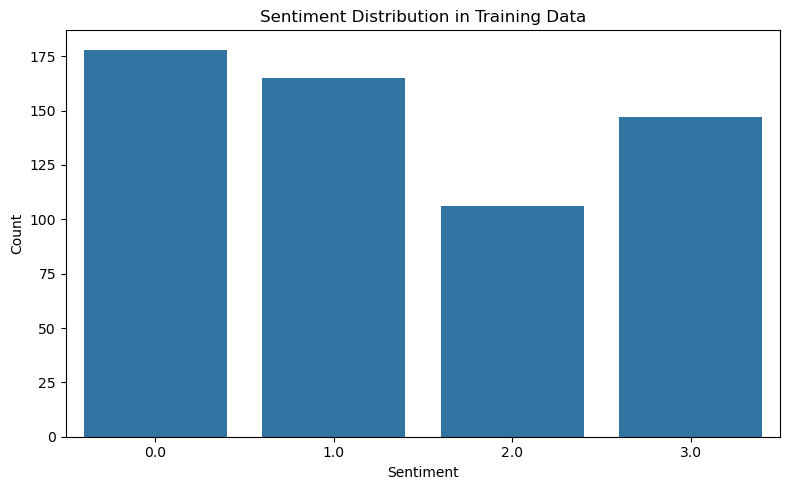


Best Model for TF-IDF: Random Forest with Accuracy: 0.4710


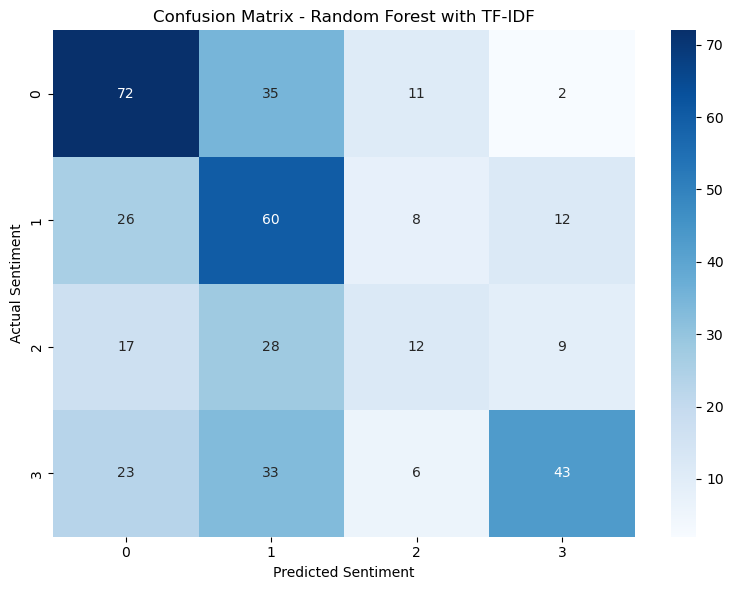

Confusion matrix saved to ../output\confusion_matrix_tf-idf_Random_Forest.png

Best Model for BERT: Random Forest with Accuracy: 0.5088


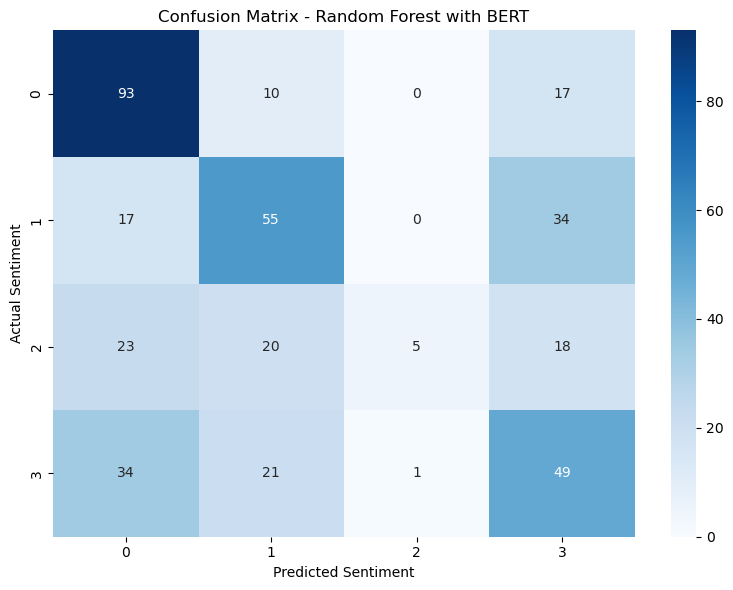

Confusion matrix saved to ../output\confusion_matrix_bert_Random_Forest.png

Best Model for Word2Vec: Linear SVM with Accuracy: 0.4534


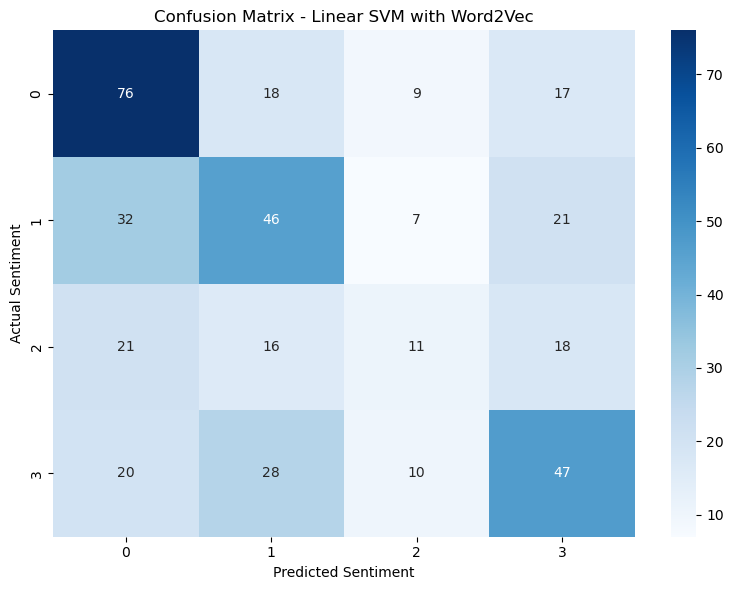

Confusion matrix saved to ../output\confusion_matrix_word2vec_Linear_SVM.png

Best Model for GloVE: Random Forest with Accuracy: 0.5239


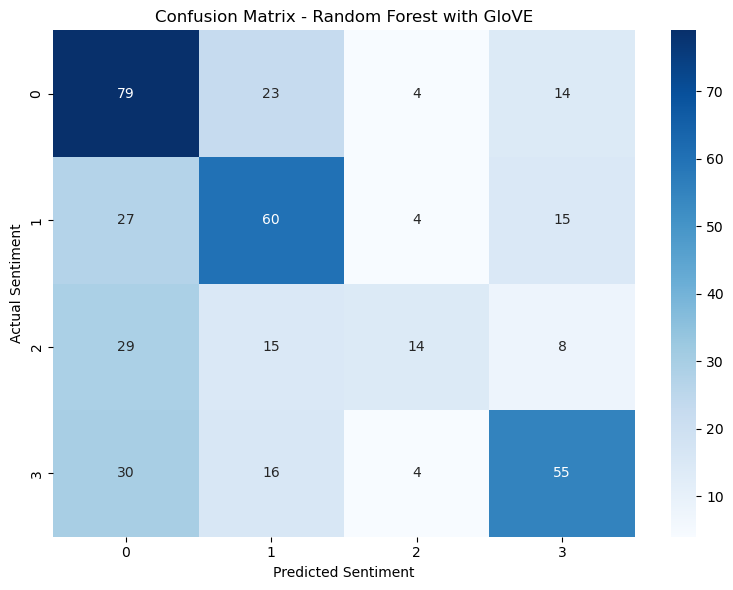

Confusion matrix saved to ../output\confusion_matrix_glove_Random_Forest.png

Best model information saved to ../output\best_models_per_feature.csv


In [5]:
"""
data loading
"""

print("_______________________________________________________________________________________________")
print("data loading")

import pandas as pd

# 加载数据
train_df = pd.read_csv('C:/Users/LENOVO/Downloads/Lexicon-main/Lexicon-main/dataset/traindata7.csv')
test_df = pd.read_csv('C:/Users/LENOVO/Downloads/Lexicon-main/Lexicon-main/dataset/testdata7.csv')

"""
data cleaning
"""

print("_______________________________________________________________________________________________")
print("data cleaning")

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

def game_specific_clean(text):
    text = re.sub(r'\b(gg|glhf|wp|noob|op)\b', lambda m: {
        'gg': 'good game',
        'glhf': 'good luck have fun',
        'wp': 'well played',
        'noob': 'inexperienced player',
        'op': 'overpowered'
    }[m.group(0).lower()], text, flags=re.IGNORECASE)
    return text


# 定义清洗函数
def clean_text(text):
    text = text.lower()  # 转小写
    text = game_specific_clean(text)
    text = re.sub(r'@\w+', ' ', text)  # 去除@用户
    text = re.sub(r'http\S+', ' ', text)  # 去除URL链接
    text = re.sub(r'[^a-z\s]', ' ', text)  # 去除标点符号、数字
    text = re.sub(r'\s+', ' ', text).strip()  # 去除多余空格
    return text


# 应用清洗函数
train_df['cleaned_Phrase'] = train_df['Phrase'].apply(clean_text)
test_df['cleaned_Phrase'] = test_df['Phrase'].apply(clean_text)

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def tokenize_lemmatize(text):
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)


# 应用去除停用词和词形还原
train_df['Processed'] = train_df['cleaned_Phrase'].apply(tokenize_lemmatize)
test_df['Processed'] = test_df['cleaned_Phrase'].apply(tokenize_lemmatize)

# 查看清洗后的数据
print(train_df[['Phrase', 'Processed']].head())

# 仅保存清洗后的文本和Sentiment列
train_df[['Processed', 'Sentiment']].to_csv('C:/Users/LENOVO/Downloads/Lexicon-main/Lexicon-main/dataset/cleaned_traindata7.csv', index=False)
test_df[['Processed', 'Sentiment']].to_csv('C:/Users/LENOVO/Downloads/Lexicon-main/Lexicon-main/dataset/cleaned_testdata7.csv', index=False)

"""
feature engineering TFIDF
"""

print("_______________________________________________________________________________________________")
print("feature engineering TFIDF")

from sklearn.feature_extraction.text import TfidfVectorizer

# 使用清洗后的文本数据进行特征提取
X_train = train_df['Processed']
y_train = train_df['Sentiment']
X_test = test_df['Processed']
y_test = test_df['Sentiment']

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

"""
feature engineering BERT
"""

print("_______________________________________________________________________________________________")
print("feature engineering BERT")

# 修改BERT特征提取部分
import torch  # 添加torch导入
import numpy as np
from transformers import AutoTokenizer, AutoModel

# 使用游戏领域专用模型
MODEL_NAME = "finiteautomata/bertweet-base-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModel.from_pretrained(MODEL_NAME)

# 优化编码函数
def bert_encode(texts, tokenizer, model, batch_size=32, max_length=64):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    all_embeddings = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(
            batch,
            return_tensors='pt',
            truncation=True,
            padding='longest',
            max_length=max_length
        ).to(device)
        
        with torch.no_grad():
            outputs = model(**inputs)
        
        # 使用最后一层CLS token作为特征
        embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        all_embeddings.extend(embeddings)
    
    return np.array(all_embeddings)

# 提取BERT特征
X_train_bert = bert_encode(X_train.tolist(), tokenizer, model)
X_test_bert = bert_encode(X_test.tolist(), tokenizer, model)

"""
feature engineering GloVE
"""

print("_______________________________________________________________________________________________")
print("feature engineering GloVE")

import os
import numpy as np
from tqdm import tqdm

# 配置参数
GLOVE_DIM = 200 
# in this part u should download glove.twitter.27B.200d in 
GLOVE_PATH = "C:/Users/LENOVO/Downloads/Lexicon-main/Lexicon-main/glove.twitter.27B/glove.twitter.27B.200d.txt"


def load_glove_embeddings(glove_path, expected_dim=200):
    embeddings_index = {}
    if not os.path.exists(glove_path):
        print(f"GloVe is not exi：{glove_path}")
        return embeddings_index

    print(f"loading GloVe （dim：{expected_dim}）")
    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in tqdm(f, desc="loading"):
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            if len(vector) != expected_dim:
                if len(vector) > expected_dim:
                    vector = vector[:expected_dim]
                else:
                    vector = np.pad(vector, (0, expected_dim - len(vector)), 'constant')

            embeddings_index[word] = vector
    print(f"successful load {len(embeddings_index)}  vectors")
    return embeddings_index


# 加载词向量
embeddings_index = load_glove_embeddings(GLOVE_PATH, GLOVE_DIM)


def glove_encode(texts, embeddings_index, dim=GLOVE_DIM):
    encoded = []
    for text in texts:
        words = text.split()

        # 处理空文本
        if not words:
            encoded.append(np.zeros(dim))
            continue

        vectors = []
        for word in words:
            # 获取词向量（带维度验证）
            vec = embeddings_index.get(word, np.zeros(dim))
            if len(vec) != dim:
                vec = np.zeros(dim)
            vectors.append(vec)

        # 计算均值
        vectors_mean = np.mean(vectors, axis=0) if vectors else np.zeros(dim)
        encoded.append(vectors_mean)

    return np.array(encoded)
#计算oov，看看词向量是否匹配
total_words = sum(len(text.split()) for text in X_train)
oov_words = sum(1 for text in X_train for word in text.split() if word not in embeddings_index)
print(f"OOV Rate: {oov_words / total_words:.2%}")
# 生成特征
X_train_glove = glove_encode(X_train, embeddings_index, dim=GLOVE_DIM)
X_test_glove = glove_encode(X_test, embeddings_index, dim=GLOVE_DIM)

# 验证输出形状
print(f"GloVe shape of train set：{X_train_glove.shape}")
print(f"GloVe shape of test set：{X_test_glove.shape}")

"""
feature engineering Word2Vec
"""

print("_______________________________________________________________________________________________")
print("feature engineering Word2Vec")

from gensim.models import Word2Vec
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 自定义Word2Vec转换器（兼容scikit-learn接口）
class Word2VecVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, vector_size=100, window=5, min_count=2, sg=0, epochs=10):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.sg = sg  # 0: CBOW, 1: Skip-Gram
        self.epochs = epochs
        self.model = None
        self.dim = vector_size

    def fit(self, X, y=None):
        # 将文本转换为token列表
        sentences = [text.split() for text in X]
        
        # 训练Word2Vec模型
        self.model = Word2Vec(
            sentences=sentences,
            vector_size=self.vector_size,
            window=self.window,
            min_count=self.min_count,
            sg=self.sg,
            epochs=self.epochs,
            workers=4
        )
        return self

    def transform(self, X):
        # 将文本转换为向量均值
        return np.array([
            self._text_to_vec(text) for text in X
        ])

    def _text_to_vec(self, text):
        vectors = [self.model.wv[word] for word in text.split() if word in self.model.wv]
        return np.mean(vectors, axis=0) if vectors else np.zeros(self.dim)

# 构建完整Pipeline
w2v_pipeline = Pipeline([
    ('w2v', Word2VecVectorizer()),  # 自定义词向量转换器
    ('clf', LogisticRegression(max_iter=1000))  # 下游分类器
])

# 定义参数搜索空间
param_grid = {
    'w2v__vector_size': [50, 100, 200],      # 向量维度
    'w2v__window': [1, 3, 5],              # 上下文窗口
    'w2v__sg': [0, 1],                  # 算法选择
    'w2v__min_count': [1, 2, 3],           # 最小词频
    'w2v__epochs': [10, 30, 40],            # 训练轮次 
    'clf__C': [0.1, 1, 10]             # 分类器正则化参数
}

# 初始化GridSearch
grid_search = GridSearchCV(
    estimator=w2v_pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=2,  # 使用2折交叉验证加速
    n_jobs=-1,
    verbose=1
)

# 执行网格搜索
print("Start Word2Vec parameter tuning...")
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# 使用最优模型生成特征
best_w2v_model = grid_search.best_estimator_.named_steps['w2v'].model

def optimized_word2vec_encode(texts, model, dim):
    encoded = []
    for text in texts:
        vectors = [model.wv[word] for word in text.split() if word in model.wv]
        if vectors:
            vectors_mean = np.mean(vectors, axis=0)
        else:
            vectors_mean = np.zeros(dim)
        encoded.append(vectors_mean)
    return np.array(encoded)

# 获取最优维度参数
best_dim = grid_search.best_params_['w2v__vector_size']

# 生成优化后的特征
X_train_w2v = optimized_word2vec_encode(X_train, best_w2v_model, best_dim)
X_test_w2v = optimized_word2vec_encode(X_test, best_w2v_model, best_dim)

"""
different data models
"""

print("_______________________________________________________________________________________________")
print("different data models")

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import os

# 创建output文件夹（若不存在）
output_dir = '../output'
os.makedirs(output_dir, exist_ok=True)

# 定义各个特征集
feature_sets = {
    'TF-IDF': (X_train_tfidf, X_test_tfidf),
    'BERT': (X_train_bert, X_test_bert),
    'GloVE': (X_train_glove, X_test_glove),
    'Word2Vec': (X_train_w2v, X_test_w2v)  # 使用优化后的特征
}

# 模型列表定义
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=28),
    'Gradient Boosting': GradientBoostingClassifier(random_state=28),
    'Random Forest': RandomForestClassifier(random_state=28),
    'Linear SVM': LinearSVC(random_state=28, max_iter=100),
    'Multinomial Naive Bayes': MultinomialNB()
}

# 存储模型准确率
model_accuracies = {}

# 循环对比每种特征的效果
for feature_name, (X_tr, X_te) in feature_sets.items():
    print(f"\n feature: {feature_name}")

    for model_name, model in models.items():
        if model_name == 'Multinomial Naive Bayes' and feature_name in ['BERT', 'GloVE', 'Word2Vec']:
            print(f"skip {model_name} with {feature_name} for feature involve negative numbers")
            continue

        model.fit(X_tr, y_train)
        predictions = model.predict(X_te)
        accuracy = accuracy_score(y_test, predictions)
        model_accuracies[model_name + " with " + feature_name] = accuracy
        print(f"{model_name} with {feature_name}: Accuracy = {accuracy:.4f}")
        print(classification_report(y_test, predictions))

# 比较各个模型的准确率
print("\nModel Performance Comparison:")
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")

# 将模型性能保存到csv文件中
performance_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])
performance_df.to_csv(os.path.join(output_dir, 'model_performance_comparison.csv'), index=False)

print(f"\nresults saved to {os.path.join(output_dir, 'model_performance_comparison.csv')}")
"""
baseline model regression
"""

print("_______________________________________________________________________________________________")
print("baseline model regression")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 训练基线模型
baseline_model = LogisticRegression(max_iter=200)
baseline_model.fit(X_train_tfidf, y_train)

# 测试基线模型性能
baseline_preds = baseline_model.predict(X_test_tfidf)
baseline_accuracy = accuracy_score(y_test, baseline_preds)
print(f'Baseline Logistic Regression Accuracy: {baseline_accuracy:.4f}')
print(classification_report(y_test, baseline_preds))

"""
different data models
"""

print("_______________________________________________________________________________________________")
print("different data models")

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import os

# 创建output文件夹（若不存在）
output_dir = '../output'
os.makedirs(output_dir, exist_ok=True)

# 定义各个特征集
feature_sets = {
    'TF-IDF': (X_train_tfidf, X_test_tfidf),
    'BERT': (X_train_bert, X_test_bert),
    'GloVE': (X_train_glove, X_test_glove),
    'Word2Vec': (X_train_w2v, X_test_w2v)
}

# 模型列表定义
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=28),
    'Gradient Boosting': GradientBoostingClassifier(random_state=28),
    'Random Forest': RandomForestClassifier(random_state=28),
    'Linear SVM': LinearSVC(random_state=28, max_iter=100),
    'Multinomial Naive Bayes': MultinomialNB()
}

# 存储模型准确率
model_accuracies = {}

# 循环对比每种特征的效果
for feature_name, (X_tr, X_te) in feature_sets.items():
    print(f"\n feature: {feature_name}")

    for model_name, model in models.items():
        if model_name == 'Multinomial Naive Bayes' and feature_name in ['BERT', 'GloVE', 'Word2Vec']:
            print(f"skip {model_name} with {feature_name} for feature involve negative numbers")
            continue

        model.fit(X_tr, y_train)
        predictions = model.predict(X_te)
        accuracy = accuracy_score(y_test, predictions)
        model_accuracies[model_name + " with " + feature_name] = accuracy
        print(f"{model_name} with {feature_name}: Accuracy = {accuracy:.4f}")
        print(classification_report(y_test, predictions))

# 比较各个模型的准确率
print("\nModel Performance Comparison:")
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")

# 将模型性能保存到csv文件中
performance_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])
performance_df.to_csv(os.path.join(output_dir, 'model_performance_comparison.csv'), index=False)

print(f"\nresults saved to {os.path.join(output_dir, 'model_performance_comparison.csv')}")

"""
hyperparameter_tuning
"""

print("_______________________________________________________________________________________________")
print("hyperparameter_tuning")

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation accuracy: {grid_search.best_score_:.4f}')

# 使用最佳参数的模型进行预测
best_model = grid_search.best_estimator_
best_preds = best_model.predict(X_test_tfidf)
best_accuracy = accuracy_score(y_test, best_preds)
print(f'Tuned Logistic Regression Accuracy: {best_accuracy:.4f}')
print(classification_report(y_test, best_preds))

"""
visualization
"""

print("_______________________________________________________________________________________________")
print("visualization")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os

# 创建output文件夹（若不存在）
output_dir = '../output'
os.makedirs(output_dir, exist_ok=True)

# # 原最佳模型可视化（逻辑回归）
# cm = confusion_matrix(y_test, best_preds)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix - Logistic Regression (Tuned)')
# plt.xlabel('Predicted Sentiment')
# plt.ylabel('Actual Sentiment')
# plt.tight_layout()
# plt.savefig(os.path.join(output_dir, 'confusion_matrix_logistic_regression.png'))
# plt.show()

# # 标签分布
# plt.figure(figsize=(8, 5))
# sns.countplot(x='Sentiment', data=train_df)
# plt.title('Sentiment Distribution in Training Data')
# plt.xlabel('Sentiment')
# plt.ylabel('Count')
# plt.tight_layout()
# plt.savefig(os.path.join(output_dir, 'label_distribution.png'))
# plt.show()

# 新增：四个特征的最佳模型可视化
features = ['TF-IDF', 'BERT', 'Word2Vec', 'GloVE']
best_model_info = {}

# 为每个特征找到最佳模型
for feature in features:
    max_acc = 0
    best_model = ''
    
    for key in model_accuracies:
        if feature in key:
            current_acc = model_accuracies[key]
            if current_acc > max_acc:
                max_acc = current_acc
                best_model = key
    
    if best_model:
        best_model_info[feature] = {
            'model': best_model.split(' with ')[0],
            'accuracy': max_acc
        }

# 生成每个特征的最佳模型混淆矩阵
for feature, info in best_model_info.items():
    model_name = info['model']
    accuracy = info['accuracy']
    print(f"\nBest Model for {feature}: {model_name} with Accuracy: {accuracy:.4f}")
    
    # 获取对应特征数据
    feature_data = {
        'TF-IDF': (X_train_tfidf, X_test_tfidf),
        'BERT': (X_train_bert, X_test_bert),
        'Word2Vec': (X_train_w2v, X_test_w2v),
        'GloVE': (X_train_glove, X_test_glove)
    }[feature]
    X_tr, X_te = feature_data

    # 初始化对应模型
    model = {
        'Decision Tree': DecisionTreeClassifier(random_state=28),
        'Gradient Boosting': GradientBoostingClassifier(random_state=28),
        'Random Forest': RandomForestClassifier(random_state=28),
        'Linear SVM': LinearSVC(random_state=28, max_iter=100),
        'Multinomial Naive Bayes': MultinomialNB()
    }[model_name]

    # 重新训练模型
    model.fit(X_tr, y_train)
    predictions = model.predict(X_te)

    # 生成混淆矩阵
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name} with {feature}')
    plt.xlabel('Predicted Sentiment')
    plt.ylabel('Actual Sentiment')
    plt.tight_layout()

    # 保存混淆矩阵图像
    filename = f'confusion_matrix_{feature.lower()}_{model_name.replace(" ", "_")}.png'
    confusion_matrix_path = os.path.join(output_dir, filename)
    plt.savefig(confusion_matrix_path)
    plt.show()

    print(f"Confusion matrix saved to {confusion_matrix_path}")

# 保存最佳模型信息到CSV
best_model_df = pd.DataFrame({
    'Feature': list(best_model_info.keys()),
    'Best Model': [info['model'] for info in best_model_info.values()],
    'Accuracy': [info['accuracy'] for info in best_model_info.values()]
})
best_model_df.to_csv(os.path.join(output_dir, 'best_models_per_feature.csv'), index=False)
print(f"\nBest model information saved to {os.path.join(output_dir, 'best_models_per_feature.csv')}")

In [13]:
!pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.7 MB 3.8 MB/s eta 0:00:01
   --- ------------------------------------ 0.2/1.7 MB 3.1 MB/s eta 0:00:01
   ------ --------------------------------- 0.3/1.7 MB 3.5 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.7 MB 3.4 MB/s eta 0:00:01
   ---------------- ----------------------- 0.7/1.7 MB 4.0 MB/s eta 0:00:01
   ------------------ --------------------- 0.8/1.7 MB 3.9 MB/s eta 0:00:01
   --------------------- ------------------ 0.9/1.7 MB 3.7 MB/s eta 0:00:01
   --------------------------- ------------ 1.2/1.7 MB 3.9 MB/s eta 0:00:01
   -------------------------------- ------- 1.4/1.7 MB 4.3 MB/s eta 0:00:01
   ----------------------------------- ---- 1.5/1.7 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.7 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 4.1 MB/s eta 0:00:00
   ----------------

  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 5] 拒绝访问。: 'E:\\anaconda3\\Lib\\site-packages\\tensorflow\\compiler\\mlir\\lite\\python\\_pywrap_converter_api.pyd'
Consider using the `--user` option or check the permissions.



In [17]:
import tensorflow as tf
import tensorflow.keras as keras
print(tf.__version__)  # 应 >= 2.0
print(keras.__version__)  # 应 >= 2.0

2.17.1
3.6.0


In [3]:
print(tf.__version__)

ERROR: Could not find a version that satisfies the requirement torch==2.0.1 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0)
ERROR: No matching distribution found for torch==2.0.1


In [27]:
from transformers import BertForSequenceClassification
print(BertForSequenceClassification)

<class 'transformers.models.bert.modeling_bert.BertForSequenceClassification'>


In [37]:
# 合并执行（推荐分步执行）
!pip install tensorflow nltk textaugment gensim scikit-learn transformers

  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ------- -------------------------------- 122.9/624.3 kB 3.5 MB/s eta 0:00:01
   -------------------------- ------------- 409.6/624.3 kB 6.3 MB/s eta 0:00:01
   ---------------------------------------  614.4/624.3 kB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------- ----------------------------- 0.4/1.5 MB 6.0 MB/s eta 0:00:01
   ----------------- ---------------------- 0.7/1.5 MB 6.0 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.5 MB 6.0 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 5.9 MB/s eta 0:00:01
   ---------------------

In [18]:
import nltk
from nltk.downloader import Downloader
downloader = Downloader()
downloader.show_progress = True
downloader.download('omw-1.4')

[nltk_data] Error loading omw-1.4: <urlopen error Tunnel connection
[nltk_data]     failed: 400 Bad Request>


False

In [24]:
!pip install --upgrade tensorflow

  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-win_amd64.whl.metadata (22 kB)
Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl (376.0 MB)
Using cached ml_dtypes-0.5.1-cp312-cp312-win_amd64.whl (210 kB)
Using cached tensorboard-2.19.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
  Rolling back uninstall of tensorflow
  Moving to e:\anaconda3\lib\site-package

  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 5] 拒绝访问。: 'E:\\anaconda3\\Lib\\site-packages\\tensorflow\\compiler\\tf2tensorrt\\_pywrap_py_utils.pyd'
Consider using the `--user` option or check the permissions.



In [19]:
# 完全卸载现有版本
!pip uninstall tensorflow tensorflow-gpu -y

Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Successfully uninstalled tensorflow-2.17.1


In [23]:
# 安装指定兼容版本（推荐2.10.0）
!pip install tensorflow==2.17.0

  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/385.2 MB 2.7 MB/s eta 0:02:23
   ---------------------------------------- 0.4/385.2 MB 3.6 MB/s eta 0:01:46
   ---------------------------------------- 0.7/385.2 MB 3.8 MB/s eta 0:01:43
   ---------------------------------------- 0.8/385.2 MB 4.0 MB/s eta 0:01:36
   ---------------------------------------- 0.9/385.2 MB 3.2 MB/s eta 0:02:01
   ---------------------------------------- 1.2/385.2 MB 3.7 MB/s eta 0:01:43
   ---------------------------------------- 1.2/385.2 MB 3.3 MB/s eta 0:01:58
   ---------------------------------------- 1.5/385.2 MB 3.7 MB/s eta 0:01:44
   -----------------

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


In [33]:
!pip install nltk textblob numpy pandas scikit-learn transformers gensim matplotlib seaborn

In [35]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
!pip install keras-tuner tensorflow

   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   --- ------------------------------------ 10.2/129.1 kB ? eta -:--:--
   --------- ----------------------------- 30.7/129.1 kB 640.0 kB/s eta 0:00:01
   ---------------------------------- ----- 112.6/129.1 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 129.1/129.1 kB 1.1 MB/s eta 0:00:00


In [21]:
!pip3 install emoji==0.6.0

     ---------------------------------------- 0.0/51.0 kB ? eta -:--:--
     ---------------- ----------------------- 20.5/51.0 kB ? eta -:--:--
     -------------------------------------- 51.0/51.0 kB 647.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49743 sha256=915ea3e86f7a84e1b40d045f3c78d90a30fb33e7594f707f67d1a349ab22e5f2
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\0d\bf\a2\536017b4a6232aef0fb92831af35facd6590c0af0f3983f63b
Successfully built emoji
